# Group 18

**Name:** Vuth Watnakpiseth & Meng Oudom


# Food and Beverage Report


#### Business Context

The food and beverage industry would like to gain insight into their sales performance and make data-driven decisions, also expecting to build an analytical dashboard to monitor KPIs and business metrics.

### 1. Calculate the Sales Amount for each transaction
(Sales Amount = Quantity * UnitPrice)

In [1]:
import pandas as pd

product_df = pd.read_csv('csv_file/Product.csv')
sales_df = pd.read_csv('csv_file/Sales.csv')

In [2]:
# Calculate the Sales Amount for each transaction
sales_df['SalesAmount'] = sales_df['Quantity'] * sales_df['UnitPrice']
sales_df.to_csv('csv_file/SalesData_with_SalesAmount.csv', index=False)

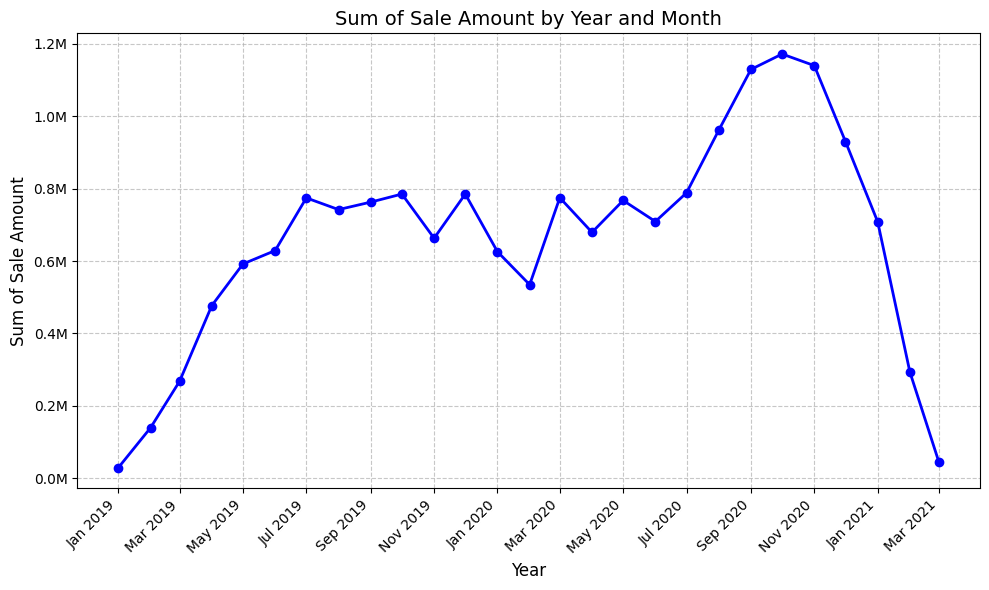

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Read the CSV file
df = pd.read_csv('csv_file/SalesData_with_SalesAmount.csv')

df['OrderDate'] = pd.to_datetime(df['OrderDate'])


df['YearMonth'] = df['OrderDate'].dt.to_period('M')
aggregated_sales = df.groupby('YearMonth')['SalesAmount'].sum().reset_index()


aggregated_sales['YearMonth'] = aggregated_sales['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(aggregated_sales['YearMonth'], aggregated_sales['SalesAmount'],
         marker='o', color='blue', linewidth=2)


plt.title('Sum of Sale Amount by Year and Month', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sum of Sale Amount', fontsize=12)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45, ha='right')


plt.ticklabel_format(axis='y', style='plain')
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))


plt.grid(visible=True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

This line Graph will show about a Sum of Amount by the year and Mouth. There is a general upward trend in sales from **January 2019** until around **October 2020**, where it peaks at around **1.2M**. After **October 2020**, there is a noticeable decline in sales, dropping sharply by **March 2021**.

### 2. Calculate total revenue, total orders, and average order value
(Average order value = total revenue/total order)

In [4]:
# Calculate total revenue, total orders, and average order value
total_revenue = sales_df['SalesAmount'].sum()
total_orders = sales_df['OrderNumber'].nunique()
average_order_value = total_revenue / total_orders


print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: ${average_order_value:,.2f}")

Total Revenue: $17,909,232.49
Total Orders: 52,560
Average Order Value: $340.74


- **Total Revenue**: The total revenue generated from all sales is $17,909,232.49.
- **Total Orders**: There were a total of 52,560 unique orders placed.
- **Average Order Value**: The average value of each order is $340.74.

### 3. Revenue by Channel, Product Category, Product Group, and Salesperson

In [5]:
# Merge sales data with product data
merged_df = pd.merge(sales_df, product_df, left_on='ProductKey', right_on='ID')

# Revenue by Channel
revenue_by_channel = merged_df.groupby('Channel')['SalesAmount'].sum()

# Revenue by Product Category
revenue_by_category = merged_df.groupby('ProductCategory')['SalesAmount'].sum()

# Revenue by Product Group
revenue_by_group = merged_df.groupby('ProductGroup')['SalesAmount'].sum()

# Revenue by Salesperson
revenue_by_salesperson = merged_df.groupby('Salesperson')['SalesAmount'].sum()


#### Revenue by Channel

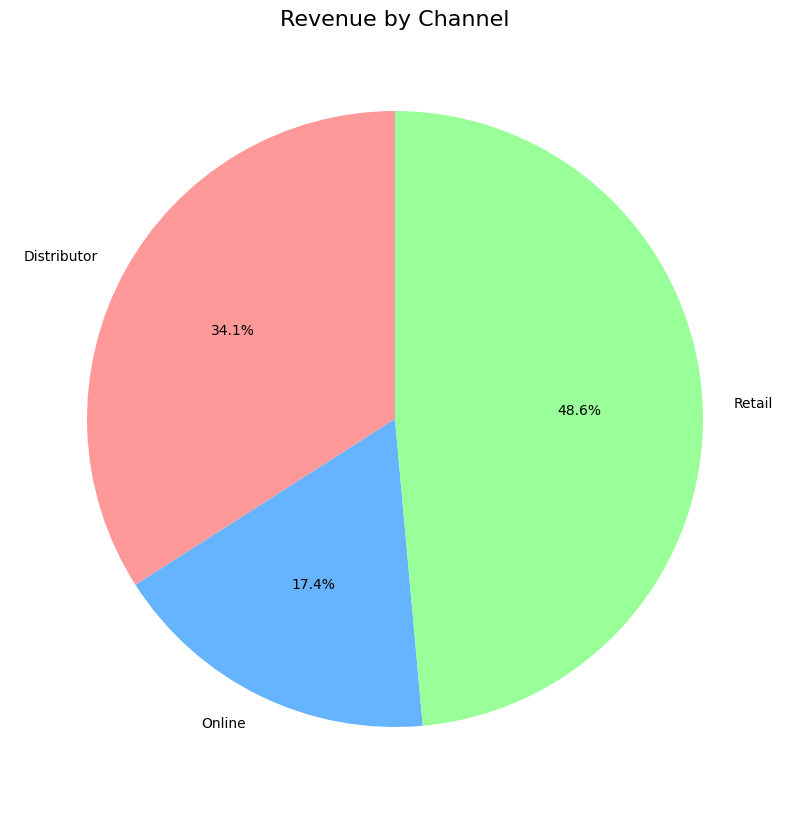

In [6]:
# Revenue by Channel
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(revenue_by_channel.values,
       labels=revenue_by_channel.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
ax.set_title('Revenue by Channel', fontsize=16)
plt.show()

+ **Retail**: This channel accounts for the largest portion of the revenue, with a share of 48.6%.
+ **Distributor**: The distributor channel contributes 34.1% to the total revenue.
+ **Online**: The online sales channel generates the smallest portion of revenue, with a share of 17.4%.

#### Revenue by Product Category

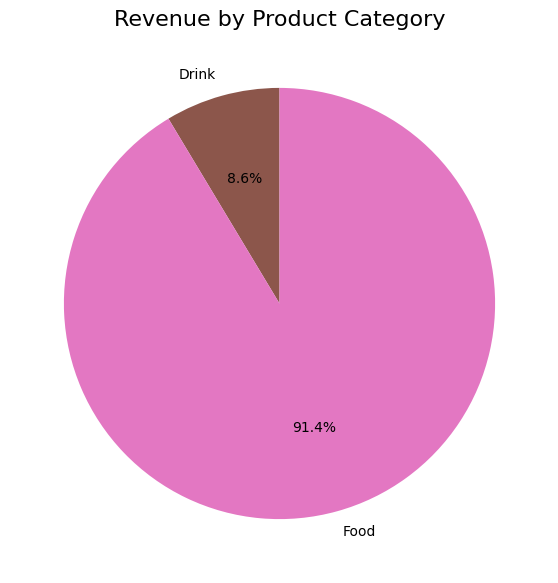

In [7]:
# Revenue by Product Category
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(revenue_by_category.values,
       labels=revenue_by_category.index, autopct='%1.1f%%', startangle=90, colors=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'])
ax.set_title('Revenue by Product Category', fontsize=16)
plt.show()

**Food** was the top-performing category, generating **$16,366,811.55** or **91.4%** of the total revenue. **Drink** accounted for the remaining **8.6%** with **$1,542,420.94** in revenue.

#### Revenue by Product Group

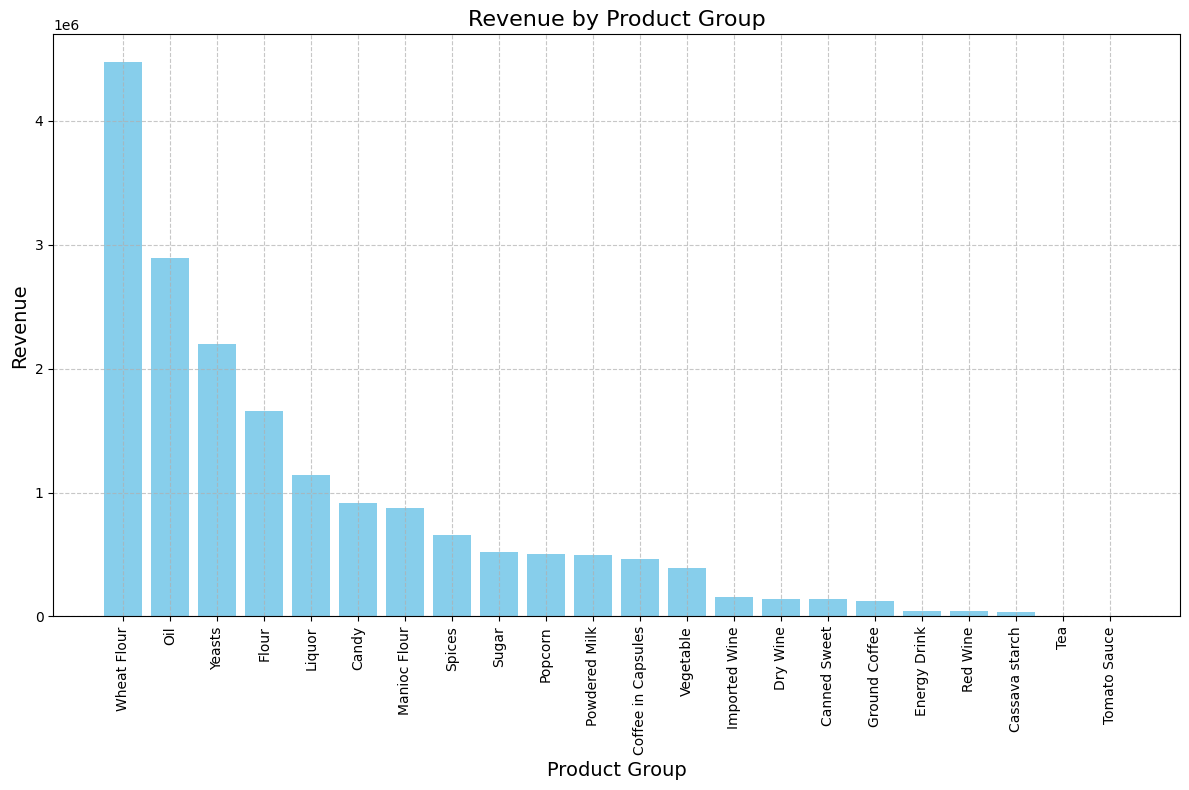

In [8]:

sorted_revenue_by_group = revenue_by_group.sort_values(ascending=False)

# Revenue by Product Group
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(sorted_revenue_by_group.index,
       sorted_revenue_by_group.values, color='skyblue')
ax.set_title('Revenue by Product Group', fontsize=16)
ax.set_xlabel('Product Group', fontsize=14,)
ax.set_ylabel('Revenue', fontsize=14)
ax.tick_params(axis='x', rotation=90)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

"**Wheat Flour** is the top-performing product group, generating the most revenue. **Tomato Sauce**, on the other hand, is the lowest-performing group."

#### Revenue by Salesperson

In [9]:
revenue_by_salesperson_df = pd.DataFrame(
    list(revenue_by_salesperson.items()), columns=['Salesperson', 'Revenue'])
revenue_by_salesperson_df = revenue_by_salesperson_df.sort_values(by='Revenue', ascending=False)# # Plotting only the table
print("Revenue by Salesperson\n")
revenue_by_salesperson_df

Revenue by Salesperson



,Salesperson,Revenue
0,Carla Ferreira,4707402.55
8,Julio Lima,3301482.32
4,Gustavo Gomes,2447136.24
2,Felipe Goncalves,1676337.10
10,Leonardo Cardoso,1607711.70
5,Isabella Sousa,870301.84
9,Kaua Araujo,821424.61
11,Mateus Costa,785240.57
3,Gustavo Barros,664172.30
6,Julia Silva,652072.53


+ Top performer: **Carla Ferreira**, with a revenue of **4,707,402.55$**.
+ Lowest performer: **Julieta Gomes**, with a revenue of **26,053.51$**.


### 4. Orders by Product Category and Salesperson

In [10]:

orders_by_category = merged_df.groupby('ProductCategory')[
    'OrderNumber'].nunique()

orders_by_salesperson = merged_df.groupby(
    'Salesperson')['OrderNumber'].nunique()

total_orders_category = orders_by_category.sum()
orders_by_category_percentage = (
    orders_by_category / total_orders_category) * 100

total_orders_salesperson = orders_by_salesperson.sum()
orders_by_salesperson_percentage = (
    orders_by_salesperson / total_orders_salesperson) * 100

#### Order Product Category

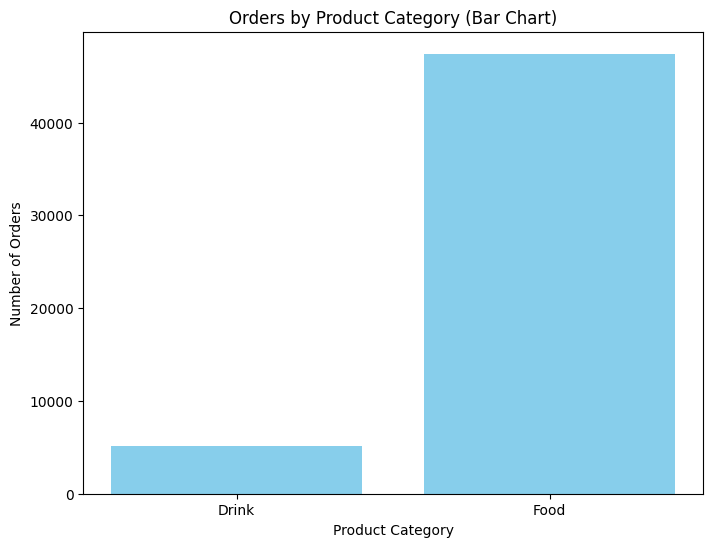

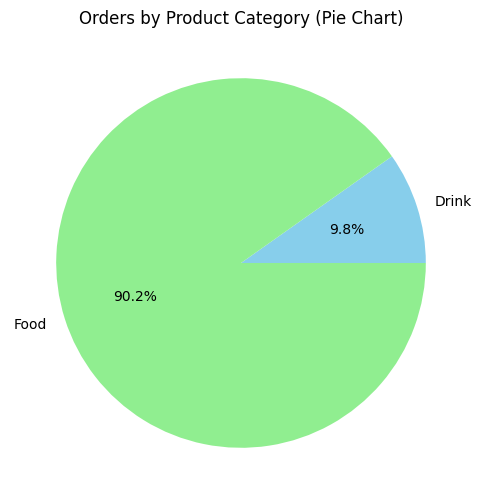

In [11]:
# Plot Orders by Product Category (Bar Chart)
plt.figure(figsize=(8, 6))
plt.bar(orders_by_category.index, orders_by_category.values, color='skyblue')
plt.title("Orders by Product Category (Bar Chart)")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.show()

# Plot Orders by Product Category (Pie Chart in %)
plt.figure(figsize=(8, 6))
plt.pie(orders_by_category.values, labels=orders_by_category.index,
        autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title("Orders by Product Category (Pie Chart)")
plt.show()

**Orders by Product Category**

+ Product Categories: The **Food** category leads with **47,414** orders (**90.21%**), while the **Drink** category has **5,146** orders (**9.79%**), indicating a stronger demand for food products.

#### Orders by Salesperson 

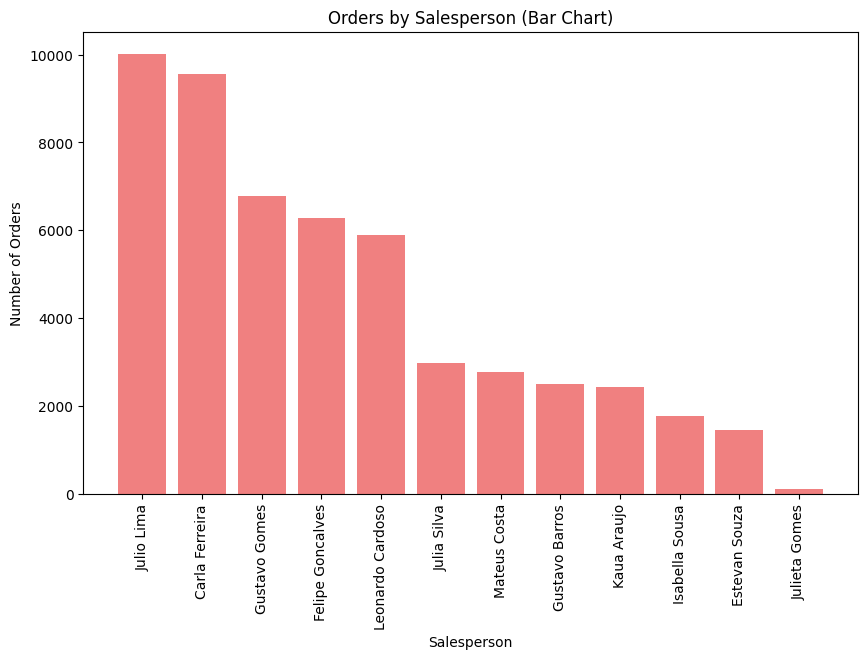

In [12]:
sorted_orders_by_salesperson = orders_by_salesperson .sort_values(
    ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_orders_by_salesperson.index,
        sorted_orders_by_salesperson.values, color='lightcoral')
plt.title("Orders by Salesperson (Bar Chart)")
plt.xlabel("Salesperson")
plt.ylabel("Number of Orders")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

**Salespeople Performance**

- **Julio Lima** and **Carla Ferreira** are the top performers, handling **19.07%** and **18.21%** of the total orders, respectively.
- Other notable salespeople include **Gustavo Gomes** (**12.92%**) and **Felipe Goncalves** (**11.96%**).
- **Julieta Gomes** handled the fewest orders, with only **0.19%** of the total.

### 5. Orders and Revenue by Quarter and Month

In [13]:
# Convert OrderDate to datetime
merged_df['OrderDate'] = pd.to_datetime(merged_df['OrderDate'])

# Extract Quarter and Month
merged_df['Quarter'] = merged_df['OrderDate'].dt.to_period('Q')
merged_df['Month'] = merged_df['OrderDate'].dt.to_period('M')

# Orders by Quarter
orders_by_quarter = merged_df.groupby('Quarter')['OrderNumber'].nunique()

# Revenue by Quarter
revenue_by_quarter = merged_df.groupby('Quarter')['SalesAmount'].sum()

# Orders by Month
orders_by_month = merged_df.groupby('Month')['OrderNumber'].nunique()

# Revenue by Month
revenue_by_month = merged_df.groupby('Month')['SalesAmount'].sum()

print("Orders by Quarter:\n", orders_by_quarter)
print("Revenue by Quarter:\n", revenue_by_quarter)
print("Orders by Month:\n", orders_by_month)
print("Revenue by Month:\n", revenue_by_month)

Orders by Quarter:
 Quarter
2019Q1     1156
2019Q2     4358
2019Q3     5885
2019Q4     6082
2020Q1     5235
2020Q2     6286
2020Q3     9552
2020Q4    10992
2021Q1     3014
Freq: Q-DEC, Name: OrderNumber, dtype: int64
Revenue by Quarter:
 Quarter
2019Q1     436333.75
2019Q2    1698259.31
2019Q3    2279957.39
2019Q4    2233671.60
2020Q1    1935853.42
2020Q2    2156452.86
2020Q3    2879796.35
2020Q4    3242706.80
2021Q1    1046201.01
Freq: Q-DEC, Name: SalesAmount, dtype: float64
Orders by Month:
 Month
2019-01      80
2019-02     368
2019-03     708
2019-04    1140
2019-05    1543
2019-06    1675
2019-07    1889
2019-08    2018
2019-09    1978
2019-10    2069
2019-11    1953
2019-12    2060
2020-01    1792
2020-02    1553
2020-03    1890
2020-04    1766
2020-05    2170
2020-06    2350
2020-07    2799
2020-08    3123
2020-09    3630
2020-10    4036
2020-11    3881
2020-12    3075
2021-01    2022
2021-02     871
2021-03     121
Freq: M, Name: OrderNumber, dtype: int64
Revenue by Month:
 Mo

#### Orders by Quarter

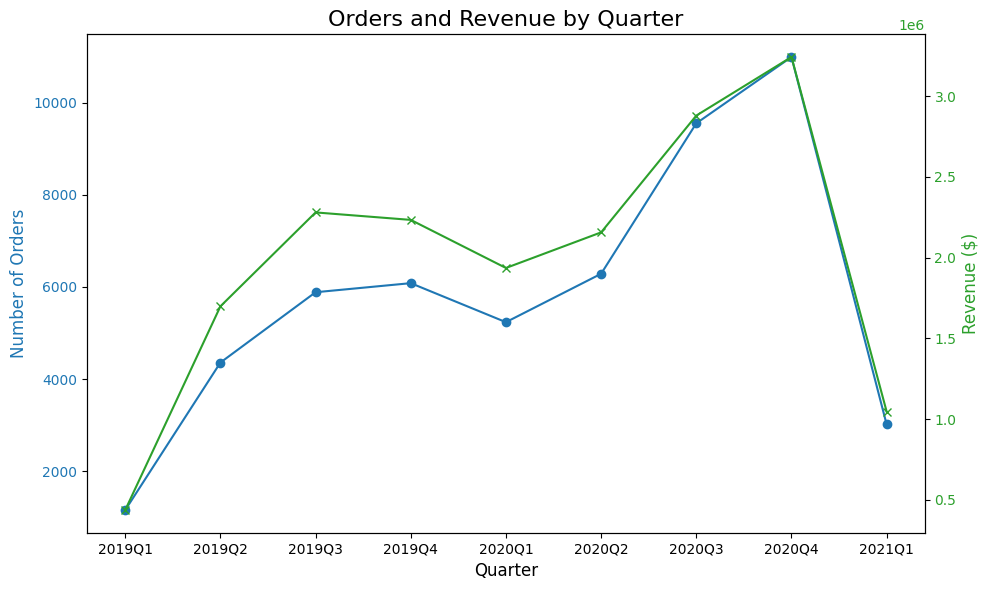

In [14]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot orders as a line chart
ax1.set_title('Orders and Revenue by Quarter', fontsize=16)
ax1.set_xlabel('Quarter', fontsize=12)
ax1.set_ylabel('Number of Orders', fontsize=12, color='tab:blue')
ax1.plot(orders_by_quarter.index.astype(str), orders_by_quarter.values,
         color='tab:blue', label='Orders', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Revenue ($)', fontsize=12, color='tab:green')
ax2.plot(revenue_by_quarter.index.astype(str), revenue_by_quarter.values,
         color='tab:green', label='Revenue', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Display the plot
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Orders by Quarter**

- **2019:** The number of orders increased steadily throughout the year, with **2019Q4** reaching the highest at **6,082 orders**.
- **2020:** There was significant growth in orders, particularly during the second half of the year, with **2020Q4** leading at **10,992 orders**, almost doubling the number of orders from **2019Q1** (**1,156 orders**).
- **2021:** Orders started to decline in early 2021, with only **3,014 orders** in **2021Q1**, marking the smallest quarter in the dataset.

**Revenue by Quarter**

- **2019:** Revenue steadily increased each quarter, peaking at **$2,233,671.60** in **2019Q4**.
- **2020:** Revenue saw an even more significant rise throughout the year. The highest revenue was recorded in **2020Q4** at **$3,242,706.80**, a notable increase from **2020Q1** (**$1,935,853.42**).
- **2021:** Revenue dropped to **$1,046,201.01** in **2021Q1**, reflecting the drop in orders during the early part of the year.

#### Orders by Month

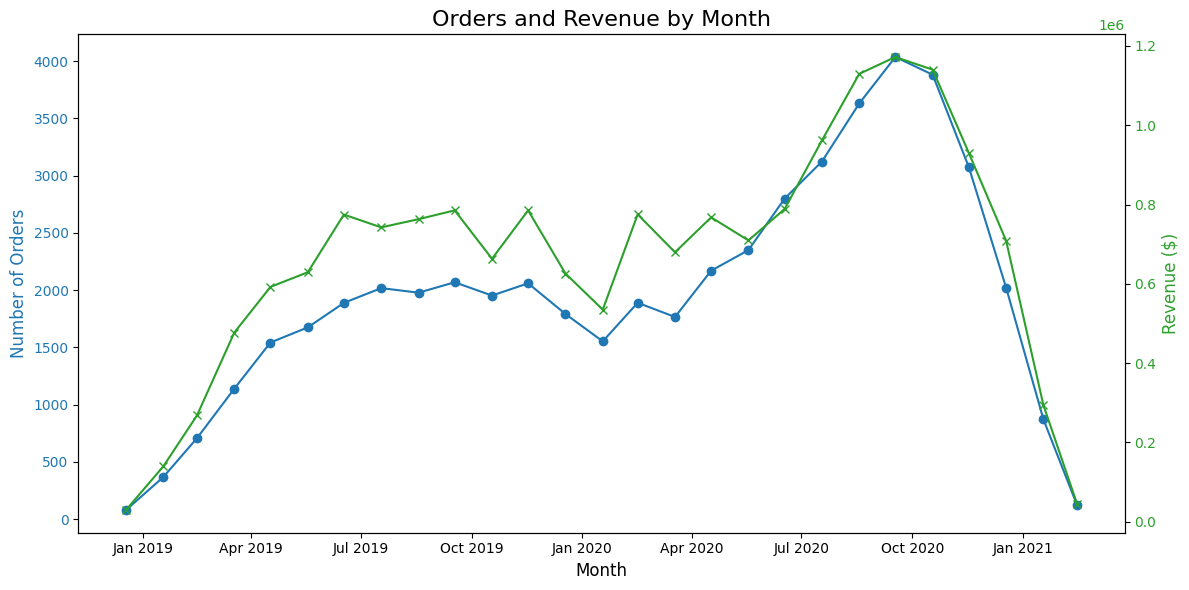

In [15]:

if isinstance(orders_by_month.index, pd.PeriodIndex):
    orders_by_month.index = orders_by_month.index.to_timestamp()

if isinstance(revenue_by_month.index, pd.PeriodIndex):
    revenue_by_month.index = revenue_by_month.index.to_timestamp()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Orders and Revenue by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Number of Orders', fontsize=12, color='tab:blue')


ax1.plot(orders_by_month.index, orders_by_month.values,
         color='tab:blue', label='Orders', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2 = ax1.twinx()
ax2.set_ylabel('Revenue ($)', fontsize=12, color='tab:green')
ax2.plot(revenue_by_month.index, revenue_by_month.values,
         color='tab:green', label='Revenue', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:green')


ax1.xaxis.set_major_formatter(
    mdates.DateFormatter('%b %Y'))


fig.tight_layout()


ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15, interval=3))

plt.xticks(rotation=45, ha='right')

plt.show()

**Orders by Month**

- **2019:** Orders started at **80 orders** in January, then steadily increased, with December seeing the highest number of monthly orders in the year, reaching **2,060 orders**.
- **2020:** Orders surged in the second half of the year. December 2020 saw **3,075 orders**, the highest monthly orders for that year.
- **2021:** There was a significant drop in orders in the early months, with only **121 orders** in March 2021, showing a sharp decline compared to previous months.

**Revenue by Month**

- **2019:** Monthly revenue started relatively low at **$29,102.49** in January, but grew significantly throughout the year. December 2019 recorded the highest revenue at **$785,227.14**.
- **2020:** Monthly revenue reached its peak in 2020Q4, with December generating **$930,342.87** in revenue. Overall, revenue was consistently higher compared to 2019, with a notable surge in the second half of 2020.
- **2021:** Revenue decreased significantly, with March 2021 generating only **$44,026.73** in revenue, a sharp contrast to the higher months of 2020.

### 6. Salesperson Performance

In [16]:
# Salesperson performance metrics
salesperson_performance = merged_df.groupby('Salesperson').agg({
    'OrderNumber': 'nunique',
    'SalesAmount': ['sum', 'mean']
}).reset_index()
salesperson_performance.columns = [
    'Salesperson', 'TotalOrders', 'TotalRevenue', 'AverageOrderValue']

# Top-performing salesperson
top_salesperson = salesperson_performance.loc[salesperson_performance['TotalRevenue'].idxmax(
)]

print("Salesperson Performance:\n", salesperson_performance)
print("Top Salesperson:\n", top_salesperson)

Salesperson Performance:
          Salesperson  TotalOrders  TotalRevenue  AverageOrderValue
0     Carla Ferreira         9570    4707402.55          77.626110
1      Estevan Souza         1455     349897.22          53.378676
2   Felipe Goncalves         6285    1676337.10          53.203539
3     Gustavo Barros         2497     664172.30          54.899347
4      Gustavo Gomes         6790    2447136.24          73.564895
5     Isabella Sousa         1772     870301.84         123.745463
6        Julia Silva         2973     652072.53          43.436753
7      Julieta Gomes           99      26053.51         121.179116
8         Julio Lima        10022    3301482.32          63.778273
9        Kaua Araujo         2429     821424.61         126.178896
10  Leonardo Cardoso         5901    1607711.70          71.229086
11      Mateus Costa         2767     785240.57          60.767727
Top Salesperson:
 Salesperson          Carla Ferreira
TotalOrders                    9570
TotalRevenue 

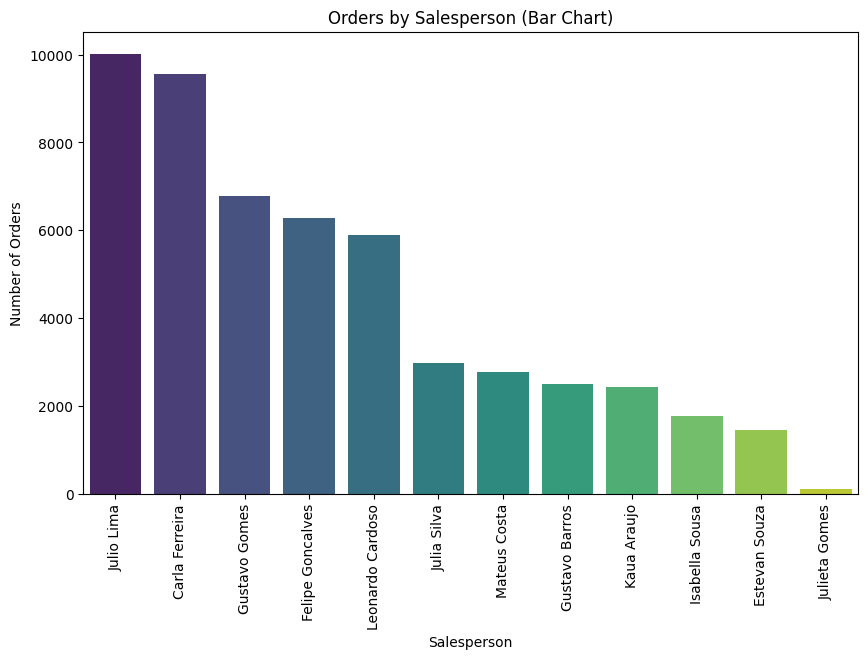

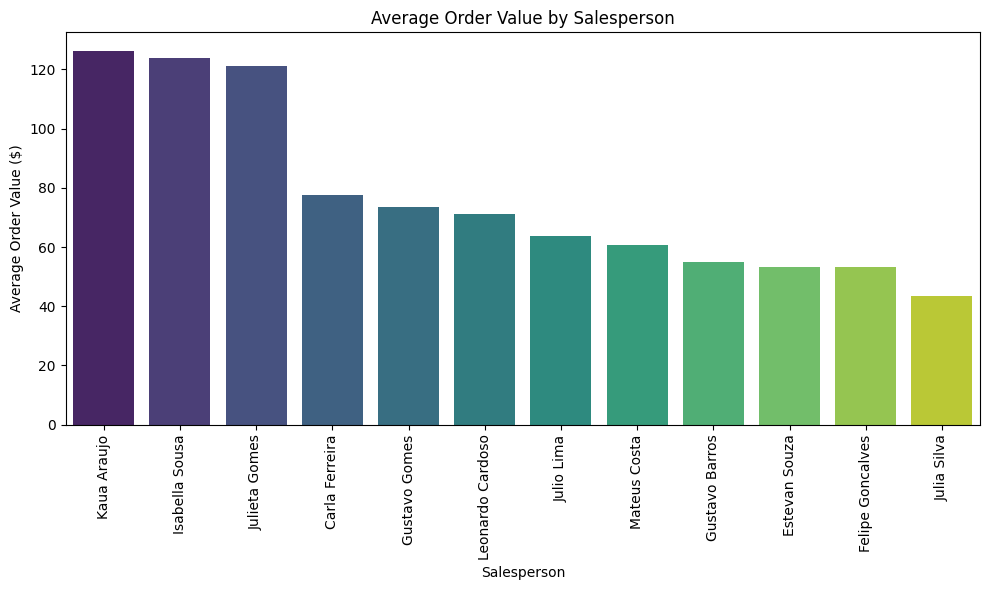

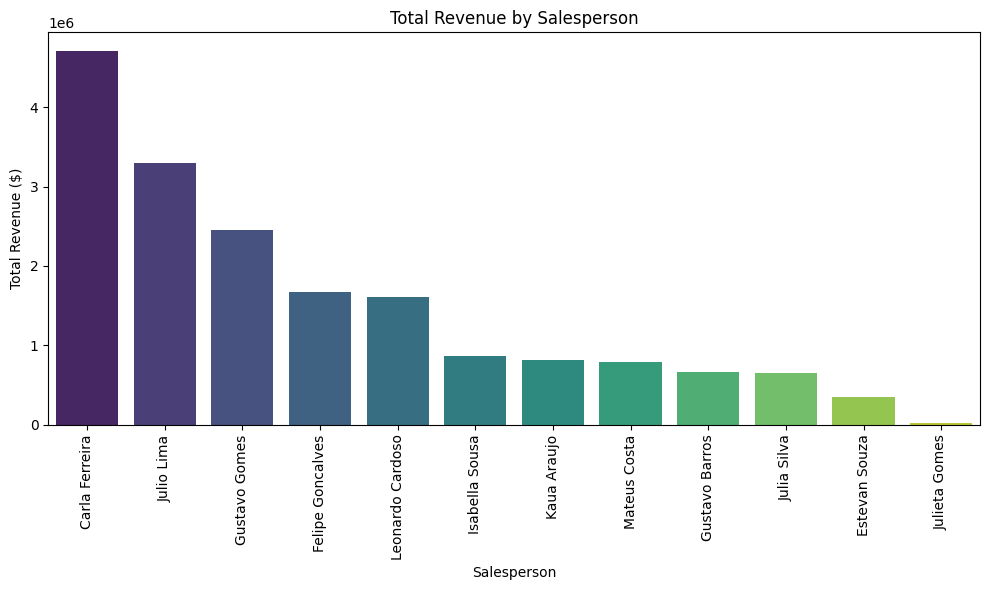

In [17]:
import seaborn as sns

salesperson_performance_sorted = salesperson_performance.sort_values(
    by='TotalOrders', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Salesperson', y='TotalOrders', data=salesperson_performance_sorted,
            palette='viridis', hue='Salesperson', dodge=False, legend=False)
plt.title("Orders by Salesperson (Bar Chart)")
plt.xlabel("Salesperson")
plt.ylabel("Number of Orders")
plt.xticks(rotation=90)
plt.show()

salesperson_performance_sorted_avg_order_value = salesperson_performance.sort_values(
    by='AverageOrderValue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Salesperson', y='AverageOrderValue', data=salesperson_performance_sorted_avg_order_value,
            palette='viridis', hue='Salesperson', dodge=False, legend=False)
plt.title('Average Order Value by Salesperson')
plt.xlabel('Salesperson')
plt.ylabel('Average Order Value ($)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()
salesperson_performance_sorted_total_revenue = salesperson_performance.sort_values(
    by='TotalRevenue', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Salesperson', y='TotalRevenue', data=salesperson_performance_sorted_total_revenue,
                 palette='viridis', hue='Salesperson', dodge=False, legend=False)
plt.title('Total Revenue by Salesperson')
plt.xlabel('Salesperson')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

**Top Salesperson**

**Carla Ferreira** stands out as the top-performing salesperson, with the highest Total Revenue of **$4,707,402.55**.
She also processed **9,570 orders** and achieved an Average Order Value of **$77.63**.

**Sales Performance Overview**

- **Isabella Sousa** has the highest Average Order Value at **$123.75**, despite having a smaller number of orders (**1,772**). She generated a total of **$870,301.84** in revenue.
- **Kaua Araujo** also had a strong performance with **$821,424.61** in total revenue, driven by an Average Order Value of **$126.18** from **2,429 orders**.
- **Felipe Goncalves** and **Gustavo Gomes** performed well with a strong balance of orders and revenue, though their Average Order Values were a bit lower than some of their peers.
- **Julieta Gomes**, with just **99 orders**, had the lowest total revenue of **$26,053.51**, but had a respectable Average Order Value of **$121.18**.

**Key Insights**

- **Carla Ferreira** leads the team in both total orders and revenue, showing exceptional sales performance.
- High Average Order Values seem to be correlated with slightly lower order counts but still contribute to strong revenue generation, as seen with **Isabella Sousa** and **Kaua Araujo**.
- The overall performance spread shows that while some salespeople have higher volumes of orders, others excel in generating higher value from fewer sales.

In conclusion, **Carla Ferreira** is the top salesperson by total revenue, but others, such as **Isabella Sousa** and **Kaua Araujo**, are noteworthy for their high revenue per order.